# Insight Data Science
Michael Boles

Data Challenge: credit card user segmentation

February 28, 2020

## Prompt and Response

### Prompt
You work as a data scientist at a credit card company. A senior VP is leading an effort to reduce costs associated with signup incentives by offering credit cards with carefully targeted benefits that will attract new cardholders. As a first step, she would like you to examine cardholder data collected over the last 6 months in order to understand the various kinds of users who use the company’s products. She is especially interested in getting an idea of which benefits to associate with each new card offering.

### Response

#### Executive summary: user segments and marketing strategy
 - Heavy credit users (Balance ≈ Credit limit)
  - Target these customers by offering competitive (high) credit limit
  - But pay attention to credit risk
 - Light credit users (Balance << Credit limit)
  - Keep these customers engaged (spending) by offering cash back
  - But avoid excessive generosity
 - Cash users (Cash advance > 0)
  - Target these customers with low cash advance fees
  - But pay attention to credit risk
  
#### Methods
 - Implemented principle component analysis (PCA) to reduce dimensionality from 17 features 2 or 3 principle components 
 - Visualization scatter data in 2- and 3D showed some linear striations of point clusters
 - Attempts to implement clustering models (k-means and Gaussian mixture) yielded unsatisfying cluster center assignment with respect to these clusters
 - However, visualization of PCA feature eigenvectors reveals three important features separating clusters: Balance, Credit limit, and Cash advance
 - Scatter plotting of customer behavior along these 3 dimensions revealed 3 key customer segments: heavy credit users, light credit users, and cash users

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prompt-and-Response" data-toc-modified-id="Prompt-and-Response-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prompt and Response</a></span><ul class="toc-item"><li><span><a href="#Prompt" data-toc-modified-id="Prompt-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prompt</a></span></li><li><span><a href="#Response" data-toc-modified-id="Response-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Response</a></span><ul class="toc-item"><li><span><a href="#Executive-summary:-user-segments-and-marketing-strategy" data-toc-modified-id="Executive-summary:-user-segments-and-marketing-strategy-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Executive summary: user segments and marketing strategy</a></span></li><li><span><a href="#Methods" data-toc-modified-id="Methods-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Methods</a></span></li></ul></li></ul></li><li><span><a href="#Initial-Data-Analysis" data-toc-modified-id="Initial-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Loading-packages-and-data-set" data-toc-modified-id="Loading-packages-and-data-set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading packages and data set</a></span></li><li><span><a href="#Checking-size-of-data-set-and-data-types" data-toc-modified-id="Checking-size-of-data-set-and-data-types-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking size of data set and data types</a></span></li><li><span><a href="#Looking-at-most-common-values,-frequency-of-missing-values" data-toc-modified-id="Looking-at-most-common-values,-frequency-of-missing-values-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Looking at most common values, frequency of missing values</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Outlier-removal" data-toc-modified-id="Outlier-removal-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-summary" data-toc-modified-id="Data-summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data summary</a></span></li><li><span><a href="#Feature-histograms" data-toc-modified-id="Feature-histograms-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature histograms</a></span></li><li><span><a href="#Feature-correlation" data-toc-modified-id="Feature-correlation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Feature correlation</a></span></li></ul></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Machine Learning</a></span><ul class="toc-item"><li><span><a href="#Sample-pre-processing" data-toc-modified-id="Sample-pre-processing-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sample pre-processing</a></span></li><li><span><a href="#Principle-component-analysis-(PCA)" data-toc-modified-id="Principle-component-analysis-(PCA)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Principle component analysis (PCA)</a></span></li><li><span><a href="#Clustering:-k-means" data-toc-modified-id="Clustering:-k-means-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Clustering: k means</a></span></li><li><span><a href="#Clustering:-Gaussian-mixture" data-toc-modified-id="Clustering:-Gaussian-mixture-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Clustering: Gaussian mixture</a></span></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Feature selection</a></span></li><li><span><a href="#Customer-segmentation-via-feature-selection" data-toc-modified-id="Customer-segmentation-via-feature-selection-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Customer segmentation via feature selection</a></span></li></ul></li></ul></div>

## Initial Data Analysis

### Loading packages and data set

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import data set
data_raw = pd.read_csv('./cc_info.csv')

### Checking size of data set and data types

In [3]:
# check shape of raw data table and data type across columns
print(data_raw.shape)
print(data_raw.dtypes)

(8950, 18)
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


### Looking at most common values, frequency of missing values

In [4]:
# get most common values
values = pd.DataFrame()
for column in data_raw:
    value_counts = data_raw[column].value_counts() 
    values[str(column)] = pd.Series(value_counts.index[:10])
values.T

,0,1,2,3,4,5,6,7,8,9
CUST_ID,C17161,C11797,C18534,C12382,C18315,C19185,C11489,C14120,C13219,C14232
BALANCE,0,1100.94,40.0745,2093.84,179.766,12.6549,1893.7,1571.22,31.2856,1772.32
BALANCE_FREQUENCY,1,0.909091,0.818182,0.727273,0.545455,0.636364,0.454545,0.363636,0.272727,0.181818
PURCHASES,0,45.65,150,60,100,300,200,450,600,70
ONEOFF_PURCHASES,0,45.65,50,200,60,100,70,150,1000,250
INSTALLMENTS_PURCHASES,0,100,300,200,150,125,75,225,350,450
CASH_ADVANCE,0,1286.36,3816.47,2495.3,748.242,1572.49,5425.91,9553.96,341.361,1424.44
PURCHASES_FREQUENCY,1,0,0.083333,0.916667,0.5,0.166667,0.833333,0.333333,0.25,0.583333
ONEOFF_PURCHASES_FREQUENCY,0,0.083333,0.166667,1,0.25,0.333333,0.416667,0.5,0.583333,0.666667
PURCHASES_INSTALLMENTS_FREQUENCY,0,1,0.416667,0.916667,0.833333,0.5,0.166667,0.666667,0.75,0.083333


In [5]:
# for those most common values, get corresponding counts
counts = pd.DataFrame()
for column in data_raw:
    value_counts = data_raw[column].value_counts()
    counts[str(column)] = pd.Series(value_counts.values[:10])
counts.T

,0,1,2,3,4,5,6,7,8,9
CUST_ID,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BALANCE,80.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BALANCE_FREQUENCY,6211.0,410.0,278.0,223.0,219.0,209.0,172.0,170.0,151.0,146.0
PURCHASES,2044.0,27.0,16.0,16.0,13.0,13.0,13.0,12.0,10.0,10.0
ONEOFF_PURCHASES,4302.0,46.0,17.0,15.0,13.0,13.0,12.0,12.0,12.0,11.0
INSTALLMENTS_PURCHASES,3916.0,14.0,14.0,14.0,12.0,11.0,9.0,8.0,8.0,8.0
CASH_ADVANCE,4628.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PURCHASES_FREQUENCY,2178.0,2043.0,677.0,396.0,395.0,392.0,373.0,367.0,345.0,316.0
ONEOFF_PURCHASES_FREQUENCY,4302.0,1104.0,592.0,481.0,418.0,355.0,244.0,235.0,197.0,167.0
PURCHASES_INSTALLMENTS_FREQUENCY,3915.0,1331.0,388.0,345.0,311.0,310.0,305.0,292.0,291.0,275.0


In [6]:
# check number of missing values across columns 
columns = list(data_raw.columns)
percent_missing = [round(data_raw[column].isna().mean()*100,2) for column in columns]
missing_dict = dict(zip(columns, percent_missing))
missing_dict

{'CUST_ID': 0.0,
 'BALANCE': 0.0,
 'BALANCE_FREQUENCY': 0.0,
 'PURCHASES': 0.0,
 'ONEOFF_PURCHASES': 0.0,
 'INSTALLMENTS_PURCHASES': 0.0,
 'CASH_ADVANCE': 0.0,
 'PURCHASES_FREQUENCY': 0.0,
 'ONEOFF_PURCHASES_FREQUENCY': 0.0,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0.0,
 'CASH_ADVANCE_FREQUENCY': 0.0,
 'CASH_ADVANCE_TRX': 0.0,
 'PURCHASES_TRX': 0.0,
 'CREDIT_LIMIT': 0.01,
 'PAYMENTS': 0.0,
 'MINIMUM_PAYMENTS': 3.5,
 'PRC_FULL_PAYMENT': 0.0,
 'TENURE': 0.0}

In [7]:
# convert columns to integers, replacing string values with column averages
data_raw = data_raw.fillna(data_raw.mean())

## Data Wrangling

### Duplicates

In [8]:
# check for duplicate entries
dups = data_raw[data_raw['CUST_ID'].duplicated(keep='first')]
print('Duplicate fraction is: ' + str(100*round(len(dups)/len(data_raw),3)) + '%')

Duplicate fraction is: 0.0%


### Outlier removal

In [9]:
# remove outliers
from scipy import stats
data_selected = data_raw.drop(columns='CUST_ID')
data_no_outliers = data_selected[(np.abs(stats.zscore(data_selected)) < 4).all(axis=1)]
fraction_retained = len(data_no_outliers)/len(data_selected)
print('Keeping ' + str(round(100*fraction_retained, 1)) + '% ('+ str(len(data_no_outliers)) + ' of ' + str(len(data_selected)) + '), excluding remainder as outliers')

Keeping 92.1% (8247 of 8950), excluding remainder as outliers


## Exploratory Data Analysis

### Data summary

In [10]:
# Examine data summary
data_no_outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8247.0,1381.584865,1739.703180,0.000000,115.774483,810.089776,1864.398128,9749.239122
BALANCE_FREQUENCY,8247.0,0.875091,0.239780,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8247.0,801.395230,1160.706492,0.000000,43.225000,354.000000,1045.355000,9030.080000
ONEOFF_PURCHASES,8247.0,462.320187,894.775671,0.000000,0.000000,34.320000,537.105000,7025.020000
INSTALLMENTS_PURCHASES,8247.0,339.313636,559.771284,0.000000,0.000000,85.840000,449.260000,4019.990000
CASH_ADVANCE,8247.0,786.845310,1452.936266,0.000000,0.000000,0.000000,987.224393,9337.271222
PURCHASES_FREQUENCY,8247.0,0.485025,0.398764,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8247.0,0.194807,0.291026,0.000000,0.000000,0.083333,0.250000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8247.0,0.358833,0.394468,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8247.0,0.122829,0.180376,0.000000,0.000000,0.000000,0.166667,0.916667


### Feature histograms 

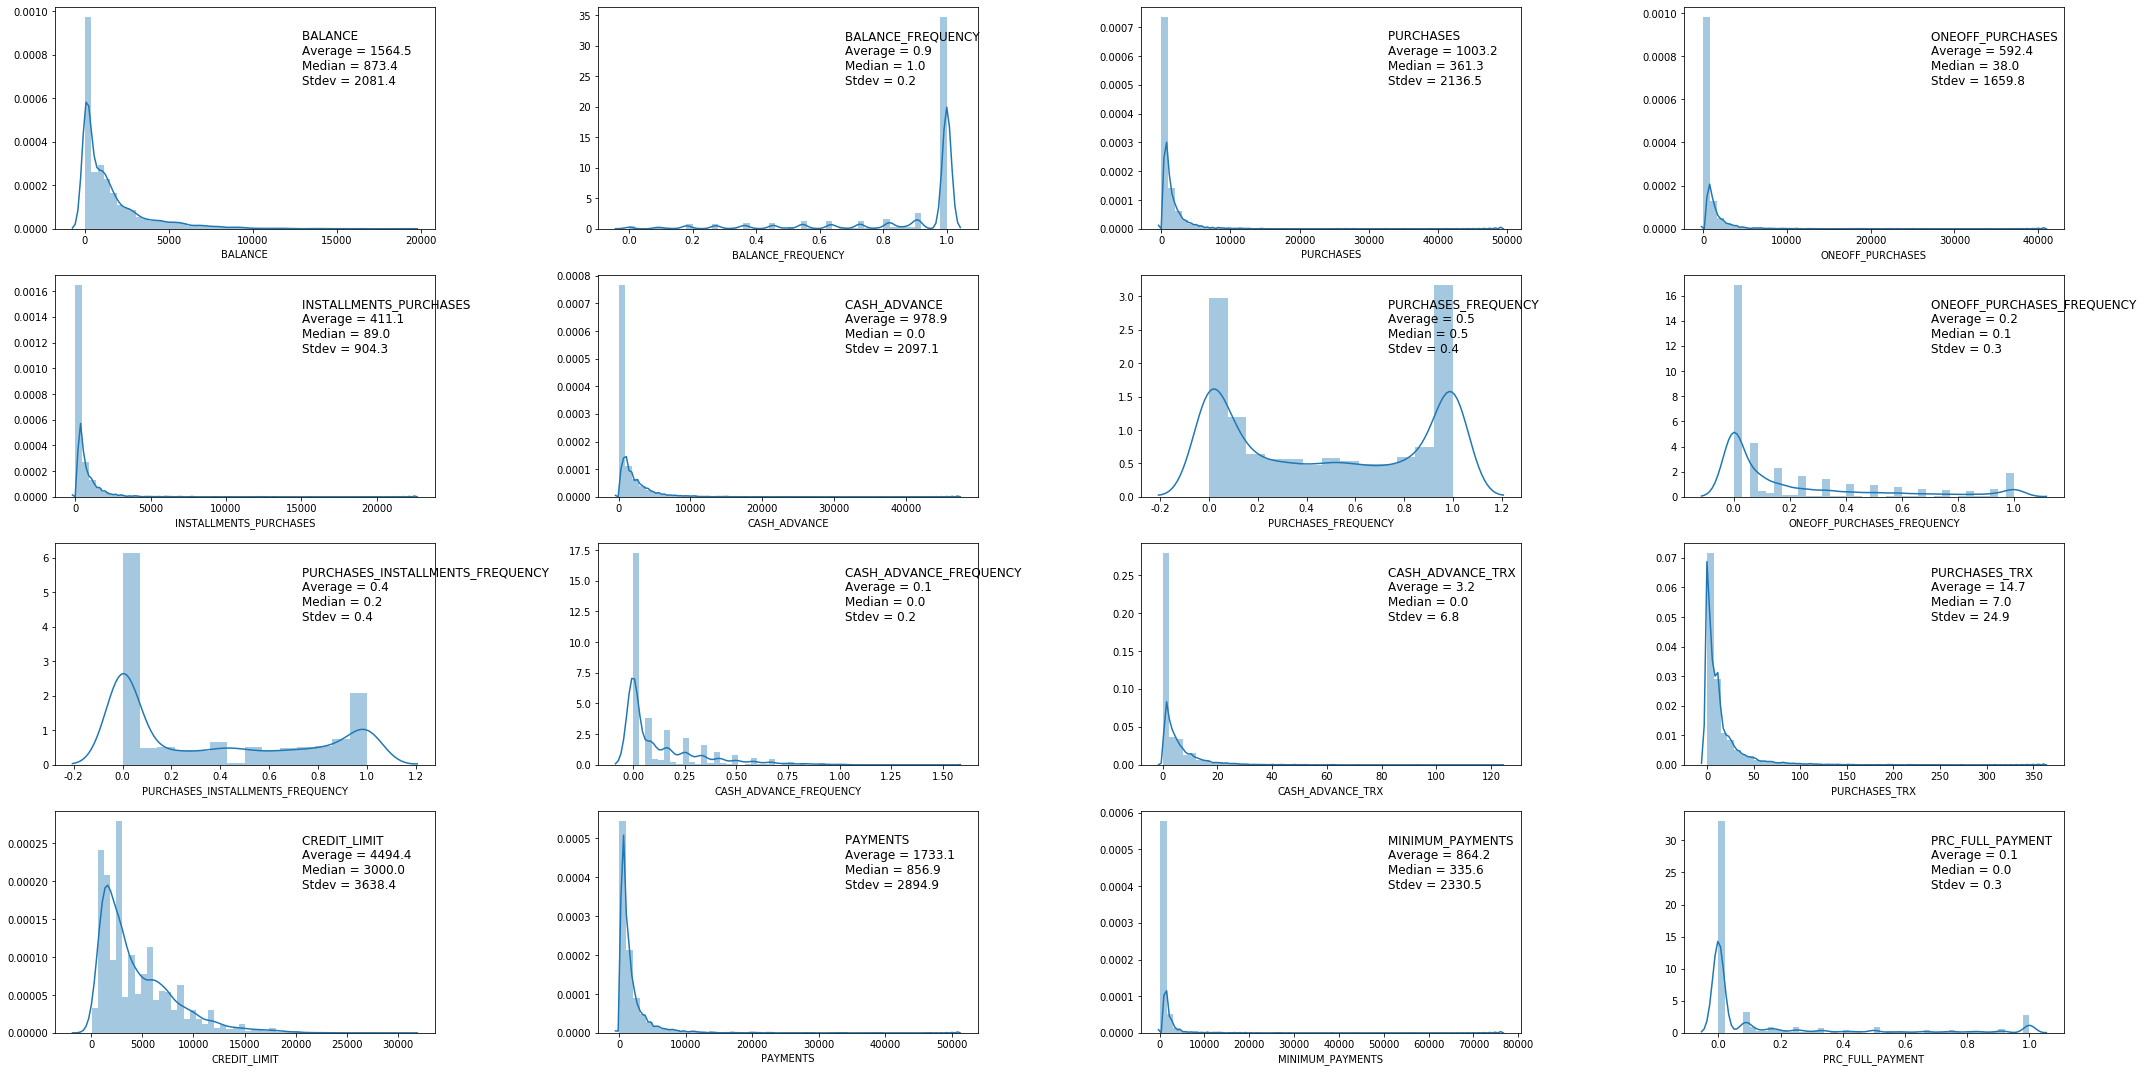

In [240]:
# Plot distributions of all features
f, axes = plt.subplots(4, 4, figsize=(30,15))
for i, ax in enumerate(axes.flatten()):

    # get feature data
    data = X.iloc[:, i]
    
    # set up textbox
    average = round(np.nanmean(data), 2)
    median = round(np.nanmedian(data), 2)
    stdev = round(np.std(data), 2)
    props = dict(facecolor='white', edgecolor='none', alpha=0.67, boxstyle='square, pad=1')
    textbox = str(X.columns[i]) + ' \nAverage = %.1f \nMedian = %.1f \nStdev = %.1f' % (average, median, stdev)
    
    sns.distplot(data, ax=ax)
    ax.text(0.65, 0.65, textbox, fontsize=12, transform=ax.transAxes)
    
plt.tight_layout()

BALANCE_FREQUENCY


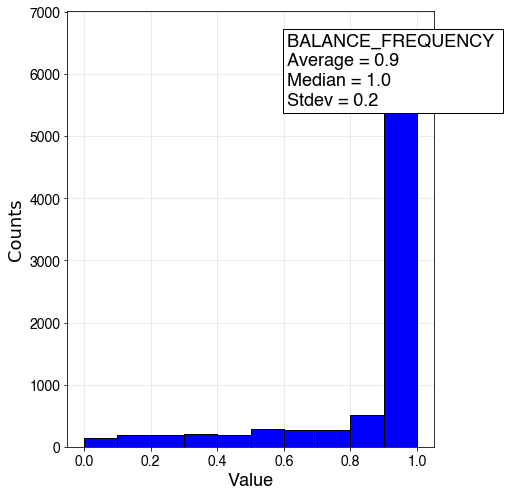

PURCHASES


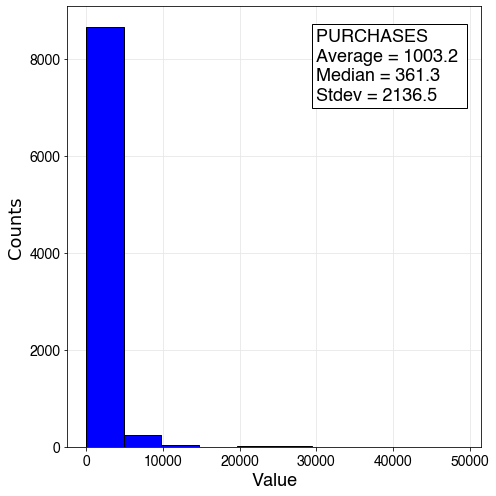

ONEOFF_PURCHASES


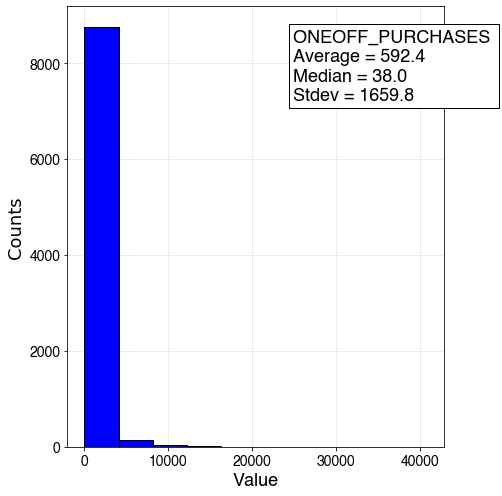

INSTALLMENTS_PURCHASES


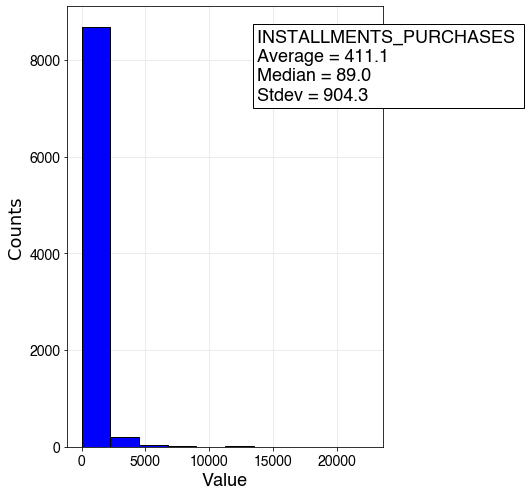

CASH_ADVANCE


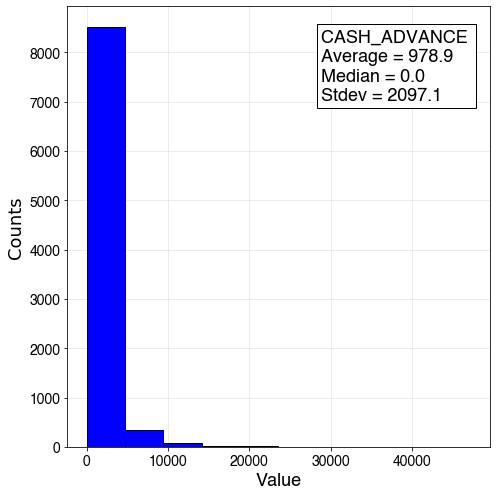

PURCHASES_FREQUENCY


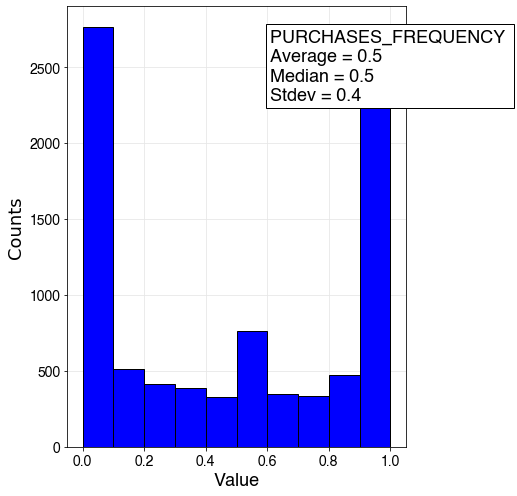

ONEOFF_PURCHASES_FREQUENCY


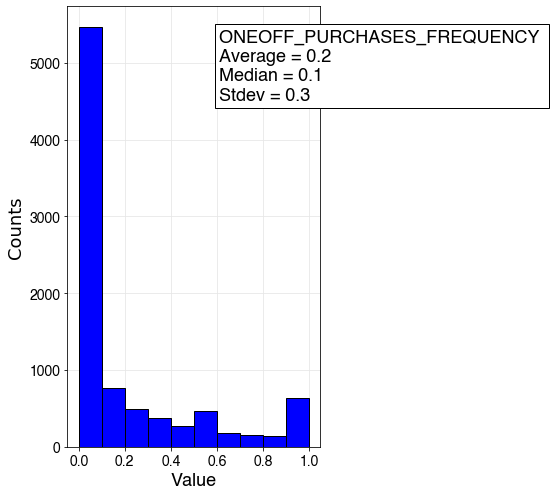

PURCHASES_INSTALLMENTS_FREQUENCY


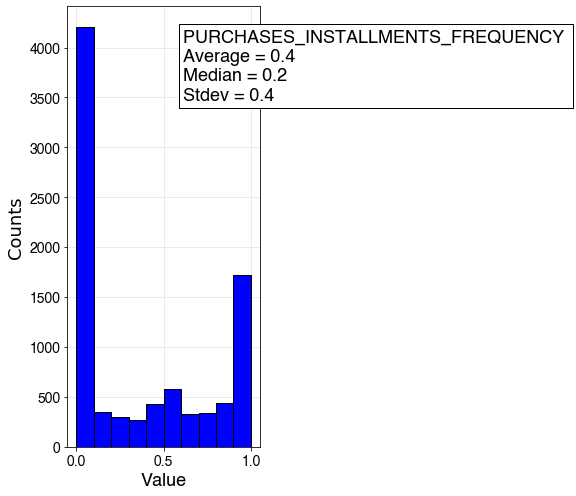

CASH_ADVANCE_FREQUENCY


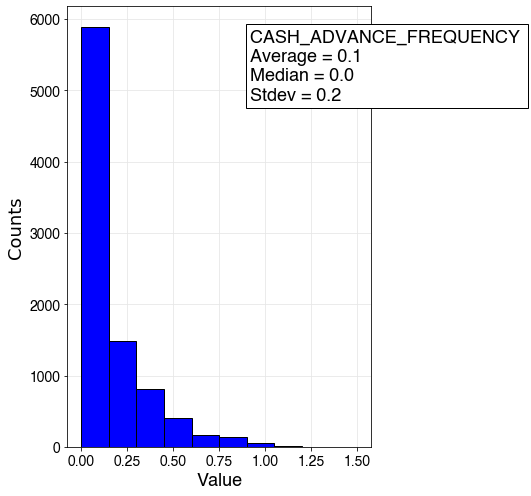

CASH_ADVANCE_TRX


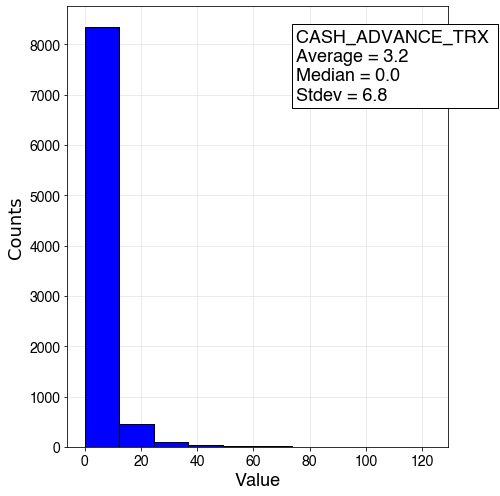

PURCHASES_TRX


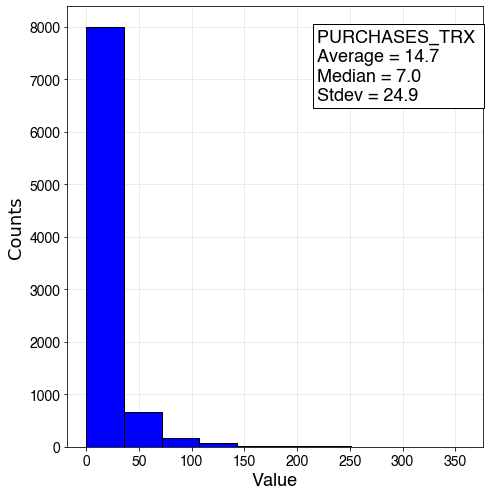

CREDIT_LIMIT


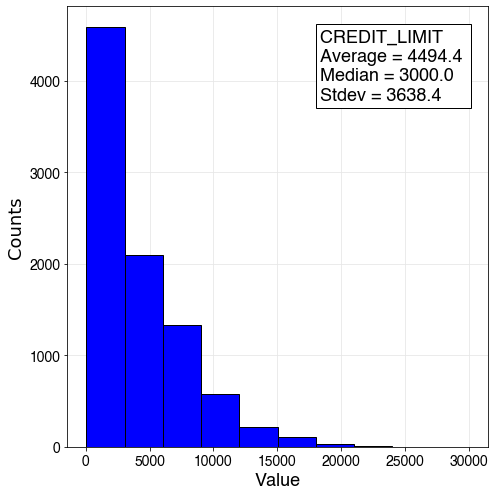

PAYMENTS


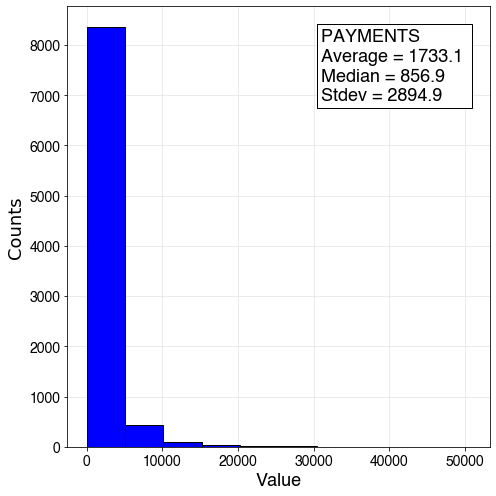

MINIMUM_PAYMENTS


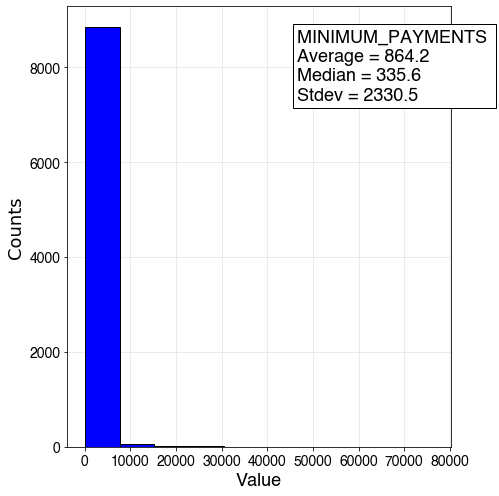

PRC_FULL_PAYMENT


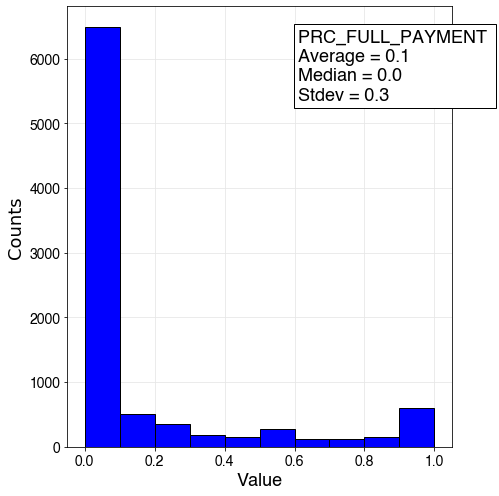

TENURE


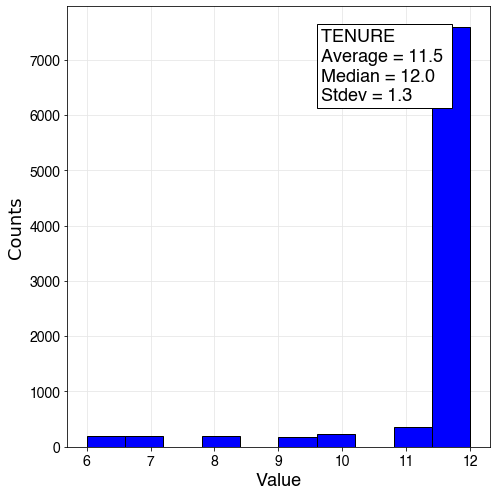

In [12]:
# plot distributions
import numpy as np

for column in data_raw.columns[2:]:
    print(column)
    data = data_raw[str(column)]

    # textbox
    average = round(np.nanmean(data), 2)
    median = round(np.nanmedian(data), 2)
    stdev = round(np.std(data), 2)
    props = dict(facecolor='white', edgecolor='none', alpha=0.67, boxstyle='square, pad=1')
    textbox = str(column) + ' \nAverage = %.1f \nMedian = %.1f \nStdev = %.1f' % (average, median, stdev)

    xlabel = 'Value'
    ylabel = 'Counts'

    from plotfunctions import plot_hist
    plot_hist(data, textbox, props, xlabel, ylabel)

### Feature correlation  

In [14]:
# # Print table of feature correlation
# data_raw.corr()

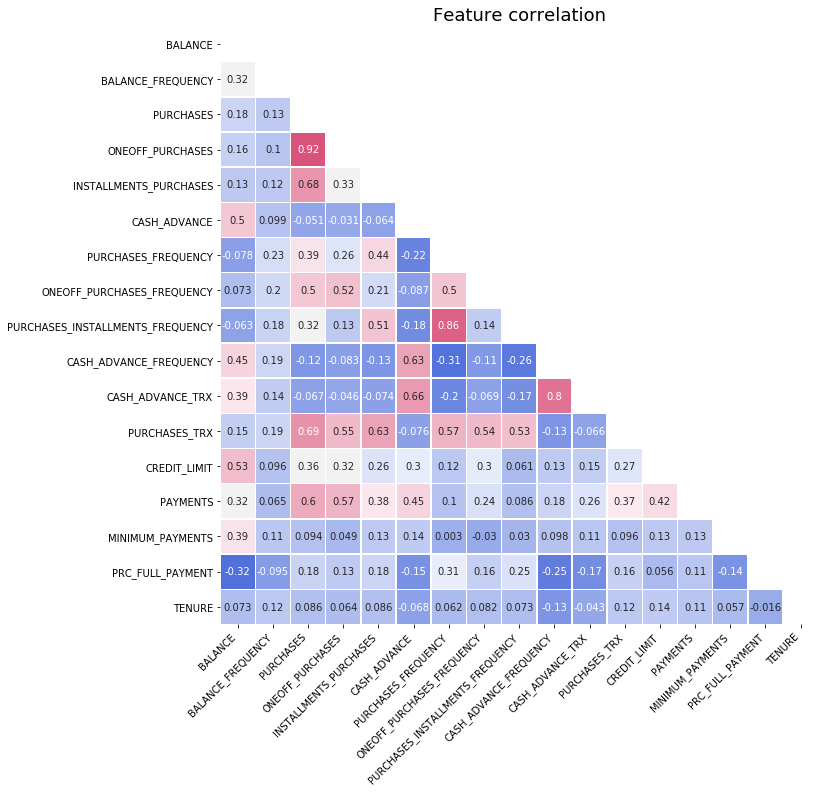

In [15]:
# Plot correlation heatmap

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data_raw.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 0, n=9, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_raw.corr(), 
            mask=mask, 
            cmap=cmap, 
            annot=True,
            annot_kws={"fontsize":10},
            vmin=data_raw.corr().min().min(), 
            vmax=data_raw.corr().max().max(),
            square=True, 
            linewidths=.5, 
            cbar=False)#### 4.2 Plot feature histograms 
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.setp(ax.get_yticklabels(), rotation=0, ha='right', fontsize=10)
ax.set_ylim(len(data_raw.columns)-1,0)
ax.set_facecolor([1,1,1])
ax.set_title('Feature correlation', fontsize=18)
plt.show()

## Machine Learning

### Sample pre-processing

In [160]:
# drop customer ID column
X = data_raw.drop(columns=['CUST_ID'])
X.shape

(8950, 17)

In [162]:
# rescale feature values to fall in (0,1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X_rescale = pd.DataFrame(min_max_scaler.fit_transform(X), 
                   columns=X.columns, index=X.index)

In [164]:
# take logarithm to spread out values
X_log = np.log(X_rescale+1)
# X_log.min()

BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

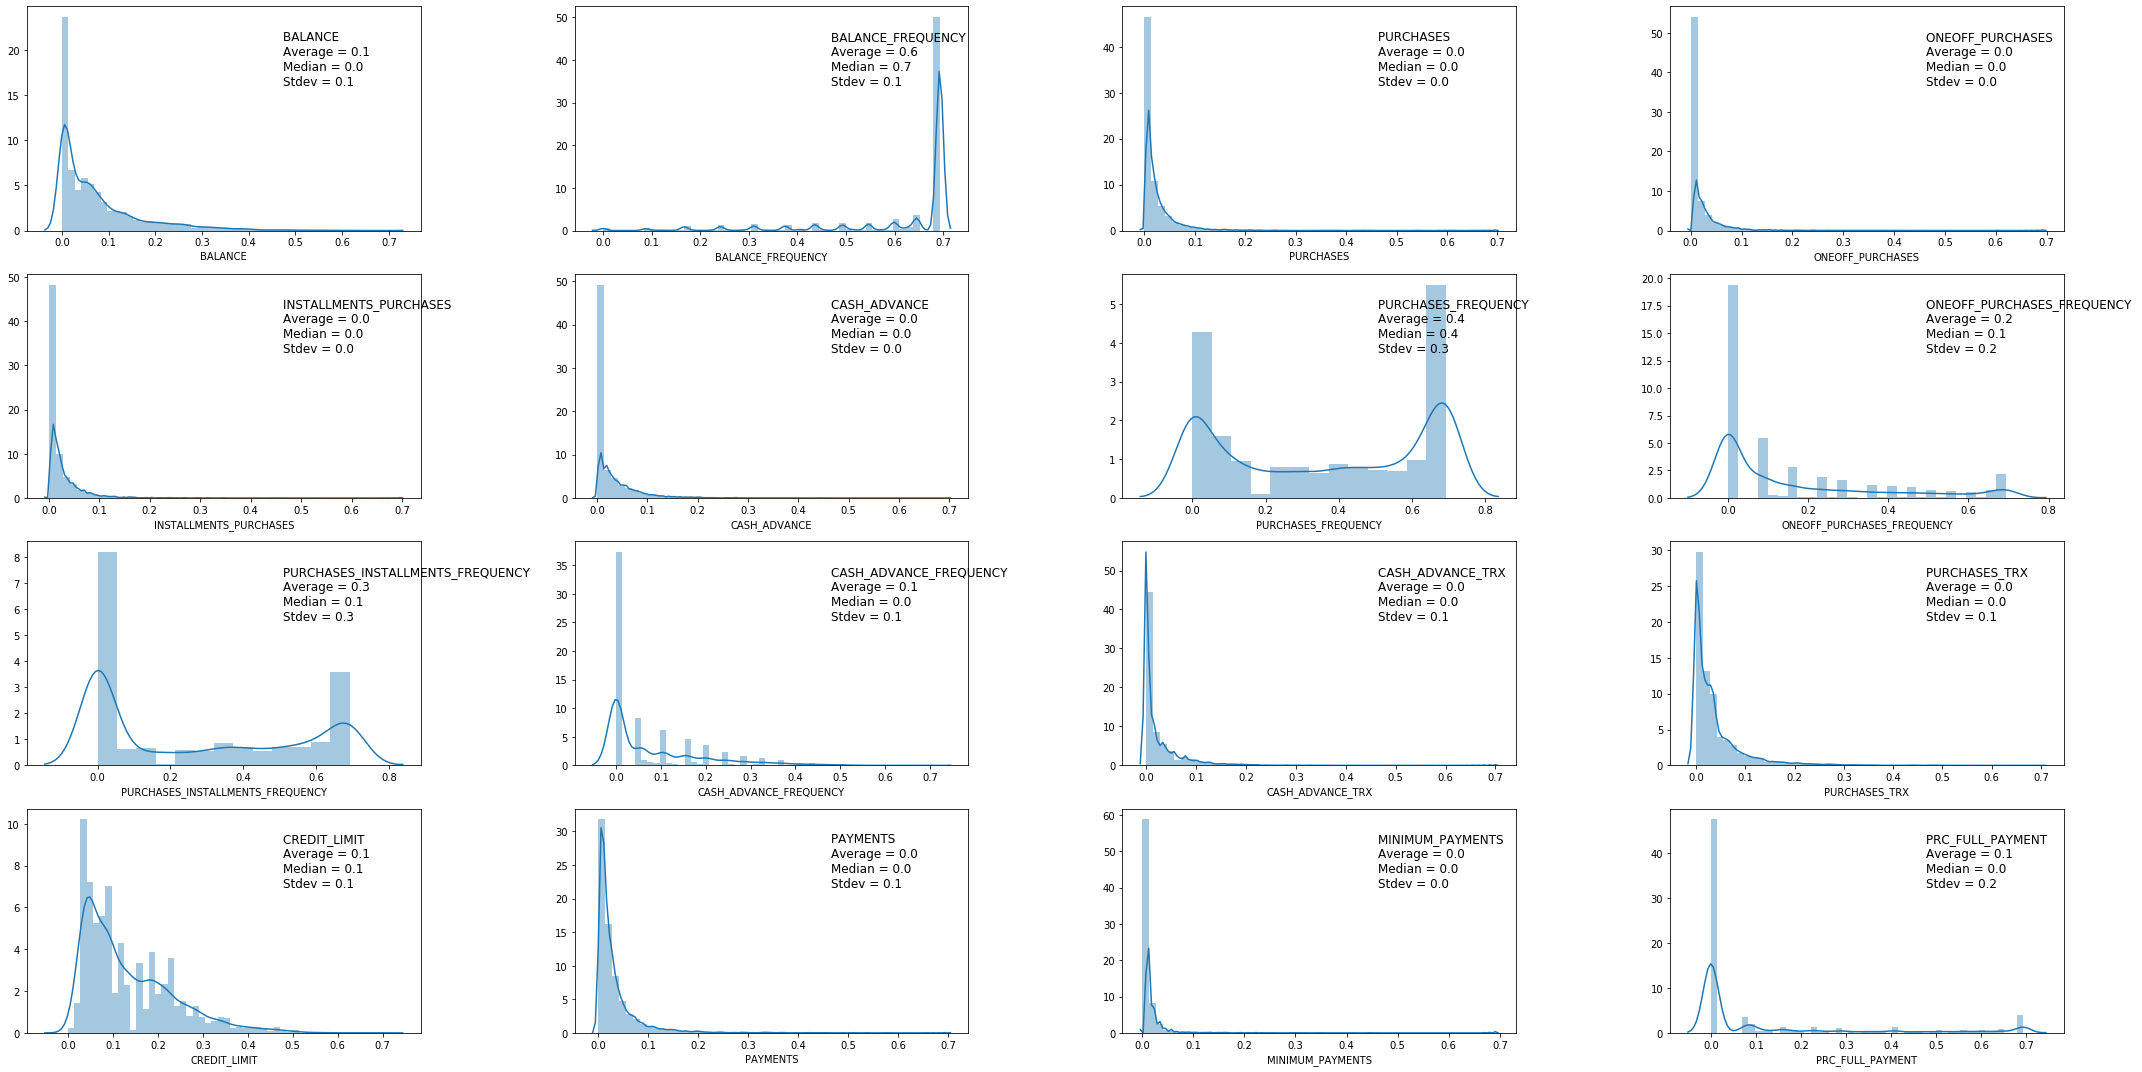

In [165]:
# Plot distributions of all features after log normalization
f, axes = plt.subplots(4, 4, figsize=(30,15))
for i, ax in enumerate(axes.flatten()):

    # get feature data
    data = X_log.iloc[:, i]
    
    # set up textbox
    average = round(np.nanmean(data), 2)
    median = round(np.nanmedian(data), 2)
    stdev = round(np.std(data), 2)
    textbox = str(X.columns[i]) + ' \nAverage = %.1f \nMedian = %.1f \nStdev = %.1f' % (average, median, stdev)
    
    sns.distplot(data, ax=ax)
    ax.text(0.65, 0.65, textbox, fontsize=12, transform=ax.transAxes)
    
plt.tight_layout()

### Principle component analysis (PCA)

In [166]:
# PCA: fit 17 features to 2 principle components 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(X)
principalComponents = pca.fit_transform(X_log)

# Create dataframe of principle components (PCA X values)
X_PCA_df = pd.DataFrame(data = principalComponents, 
                      columns = ['Component 1', 'Component 2'])

In [18]:
# # PCA: fit 17 features to 3 principle components 
# from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(X)

# # Create dataframe of principle components (PCA X values)
# X_PCA_df_3d = pd.DataFrame(data = principalComponents, 
#                       columns = ['Component 1', 'Component 2', 'Component 2'])

In [19]:
# # plot 3d PCA result - doesn't yield better looking clusters of scatter data
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize = (13,8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X_PCA_df_3d.iloc[:,0], 
#            X_PCA_df_3d.iloc[:,1], 
#            X_PCA_df_3d.iloc[:,2], 
#            alpha=0.01, 
#            lw=0.25, 
#            facecolor='blue',
#            edgecolor='black',
#            zorder=1)
  
# ax.tick_params(axis = 'x', labelsize = 10)
# ax.tick_params(axis = 'y', labelsize = 10)
# ax.tick_params(axis = 'z', labelsize = 10)

# ax.set_xlabel('\n\nComponent 1', fontname = 'Helvetica', fontsize = 12)
# ax.set_ylabel('\n\nComponent 2', fontname = 'Helvetica', fontsize = 12)
# ax.set_zlabel('\n\Component 3', fontname = 'Helvetica', fontsize = 12)

# ax.axes.set_xlim3d(left=-5000, right=2000) 
# ax.axes.set_ylim3d(top=-5000, bottom=5000) 
# ax.axes.set_zlim3d(bottom=-5000, top=500)

# ax.view_init(10, -45)
# ax.dist = 11

# plt.show()

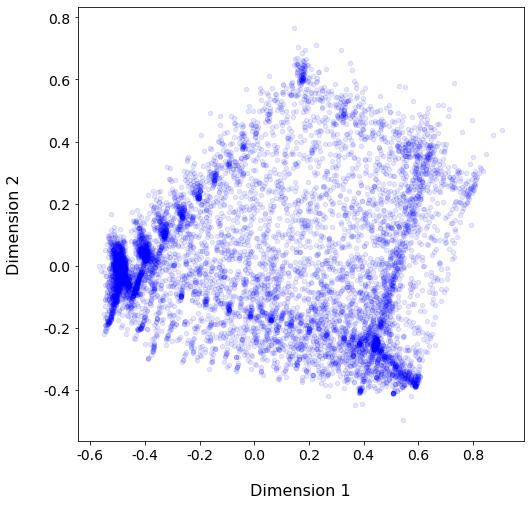

In [167]:
# Plot two-dimensional PCA result
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('\nDimension 1', fontsize = 16)
ax.set_ylabel('Dimension 2\n', fontsize = 16)
# ax.set_title('\nPCA: 17 features condensed along 2 axes\n', fontsize = 20)

ax.scatter(X_PCA_df.iloc[:,0],
           X_PCA_df.iloc[:,1],
           c = 'b',
           s = 20,
           alpha = 0.1)

ax.tick_params(labelsize=14)

# plt.xlim(-5000, 2000)
# plt.ylim(-4000, 4000)
plt.show()

In [168]:
# Get PCA components
dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(X.keys()))
components.index = dimensions
components_sorted = components.T.sort_values('Dimension 1', ascending=False)
components_sorted[:10]

,Dimension 1,Dimension 2
PURCHASES_FREQUENCY,0.6699,0.0853
PURCHASES_INSTALLMENTS_FREQUENCY,0.6382,-0.3982
ONEOFF_PURCHASES_FREQUENCY,0.2532,0.8272
PRC_FULL_PAYMENT,0.2117,-0.1758
PURCHASES_TRX,0.0963,0.0825
BALANCE_FREQUENCY,0.0789,0.1994
INSTALLMENTS_PURCHASES,0.0472,-0.0008
PURCHASES,0.0439,0.0629
CREDIT_LIMIT,0.0343,0.1641
TENURE,0.0313,0.0762


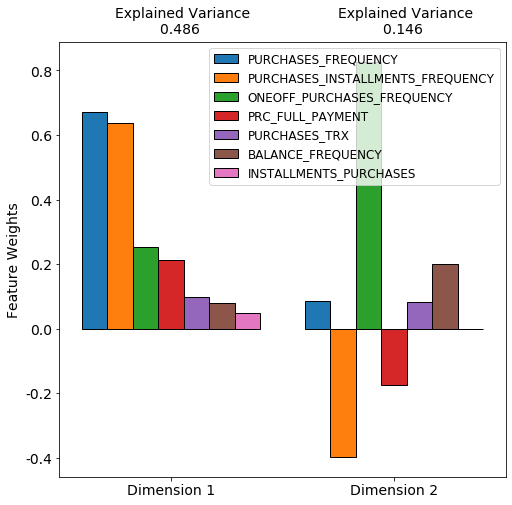

In [287]:
### Generate PCA results plot

components_top = components_sorted[:7]

# PCA explained variance
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 2), columns = ['Explained Variance'])
variance_ratios.index = dimensions

# Create a bar plot visualization
fig, ax = plt.subplots(figsize = (8,8))

# Plot the feature weights as a function of the components
components_top.T.plot(ax = ax, kind = 'bar', edgecolor='k', width=.8);
ax.set_ylabel("Feature Weights", fontsize=14)
ax.set_xticklabels(dimensions, rotation=0, fontsize=14)
ax.tick_params(labelsize=14)
plt.xlim(-0.5,1.5)

# Display the explained variance ratios
for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.25, ax.get_ylim()[1] + 0.025, "Explained Variance\n          %.3f"%(ev),
           fontsize=14)

plt.legend(fontsize=12)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

### Clustering: k means

In [171]:
# Implement k-agnostic k-means clustering
from sklearn.cluster import KMeans
wcss = []
max_clusters = 10
for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_log)
    wcss.append(kmeans.inertia_)

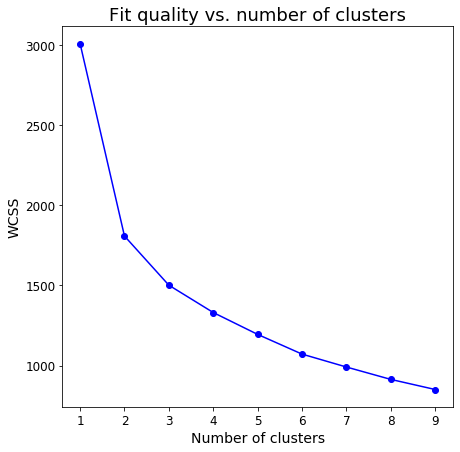

In [172]:
# Plot clustering figure of merit "within-cluster sum of squares"(WCSS) vs. k selection 
# (no 'elbow' seen - smooth drop in error with increasing cluster number)
fig, ax = plt.subplots(1, 1, figsize = (7,7))
ax.plot(range(1, max_clusters), wcss, '-o', color='b')
plt.title('Fit quality vs. number of clusters', fontsize=18)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)

# force integer x-axis
from pylab import MaxNLocator
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.tick_params(labelsize=12)
plt.show()

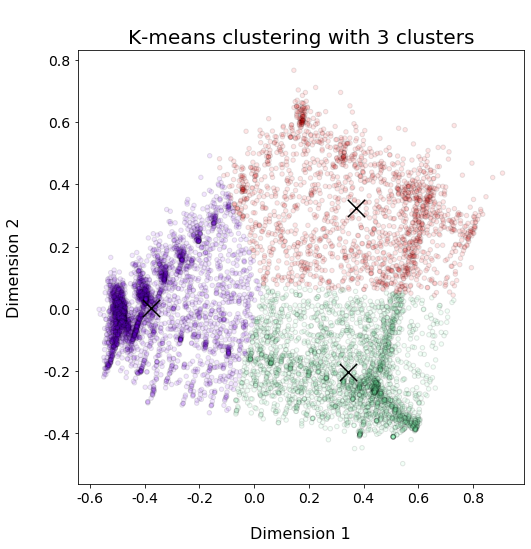

In [232]:
# Plot PCA data and cluster centers

# fit data to n clusters
n_clusters = 3
kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=100)
kmeans.fit(X_PCA_df)

# generate cluster center coordinates, cluster assignment for all points
cluster_centers = kmeans.cluster_centers_
# clusters = kmeans.fit_predict(np.array([x, y]).T)
clusters = kmeans.fit_predict(X_PCA_df)

fig = plt.figure(figsize = (8,8))
plt.set_cmap('rainbow')
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('\nDimension 1', fontsize = 16)
ax.set_ylabel('Dimension 2\n', fontsize = 16)
ax.set_title('\nK-means clustering with %s clusters' % n_clusters, fontsize = 20)

ax.scatter(cluster_centers[:, 0], 
           cluster_centers[:, 1], 
           s=300, 
           c='k',
           marker='x', 
           zorder=2)

ax.scatter(X_PCA_df.iloc[:,0],
           X_PCA_df.iloc[:,1],
           c=clusters, 
           s = 20,
           alpha = 0.1,
           edgecolors='k')

ax.tick_params(labelsize=14)
# plt.xlim(-6000, 40000)
# plt.ylim(-11000, 32000)
plt.show()

### Clustering: Gaussian mixture

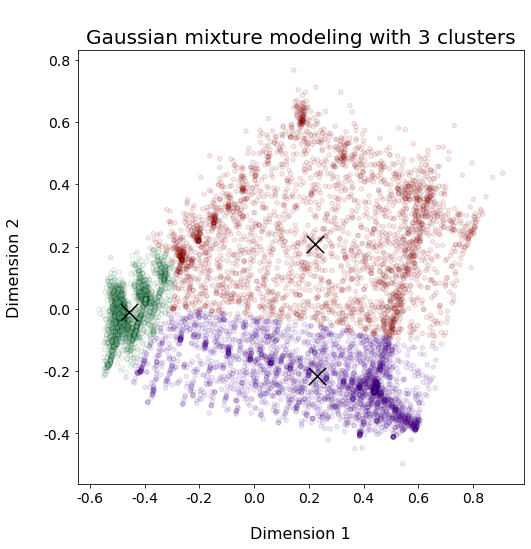

In [231]:
# Compare k-means result with Gaussian mixture modeling
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_clusters = 3

# Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(random_state=42, n_components=n)
clusterer.fit(X_PCA_df)

# Predict the cluster for each data point
preds = clusterer.predict(X_PCA_df)

# Find the cluster centers
cluster_centers = clusterer.means_

# Predict the cluster for each transformed sample data point
clusters = clusterer.predict(X_PCA_df.values)

fig = plt.figure(figsize = (8,8))
plt.set_cmap('rainbow')
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('\nDimension 1', fontsize = 16)
ax.set_ylabel('Dimension 2\n', fontsize = 16)
ax.set_title('\nGaussian mixture modeling with %s clusters' % n_clusters, fontsize = 20)

ax.scatter(cluster_centers[:, 0], 
           cluster_centers[:, 1], 
           s=300, 
           c='k', 
           marker='x', 
           zorder=2)

ax.scatter(X_PCA_df.iloc[:,0],
           X_PCA_df.iloc[:,1],
           c = clusters,
           s = 20,
           alpha = 0.1,
           edgecolors='k')

ax.tick_params(labelsize=14)
plt.show()

### Feature selection 

In [313]:
# find most important features - those with largest inter-cluster variance
X['Cluster'] = clusters
X_cluster_avg = X.groupby('Cluster').mean()
X_cluster_avg_norm = (X_cluster_avg - X_cluster_avg.mean()) / X_cluster_avg.mean() #/ X_cluster_avg.std()
variances = X_cluster_avg_norm.var(axis=0)
features_sorted = variances.sort_values(ascending=False)
features_sorted

ONEOFF_PURCHASES                    1.745561
ONEOFF_PURCHASES_FREQUENCY          1.702473
PURCHASES                           1.060306
PURCHASES_TRX                       0.914749
PURCHASES_INSTALLMENTS_FREQUENCY    0.722292
INSTALLMENTS_PURCHASES              0.657415
PURCHASES_FREQUENCY                 0.495921
PRC_FULL_PAYMENT                    0.361713
CASH_ADVANCE_FREQUENCY              0.319755
CASH_ADVANCE                        0.318634
CASH_ADVANCE_TRX                    0.284688
PAYMENTS                            0.277494
BALANCE                             0.125282
CREDIT_LIMIT                        0.107750
BALANCE_FREQUENCY                   0.006543
MINIMUM_PAYMENTS                    0.000651
TENURE                              0.000231
dtype: float64

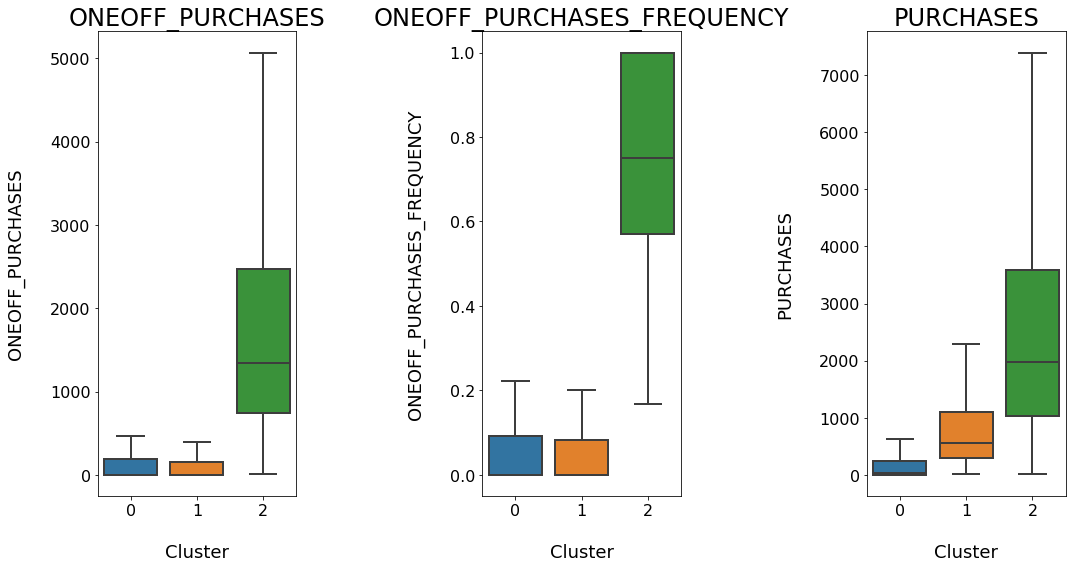

In [327]:
# plot values of key features across the clusters

feature1 = features_sorted.index[0]
feature2 = features_sorted.index[1]
feature3 = features_sorted.index[2]

# feature1 = features_sorted.index[3]
# feature2 = features_sorted.index[6]
# feature3 = features_sorted.index[7]

fig, axes = plt.subplots(1, 3, figsize=(15,8))

# cluster 1 info
sns.boxplot(x = 'Cluster', y = str(feature1), data = X, ax=axes[0],
                 showfliers = False, linewidth = 2)

axes[0].set_xlabel('\nCluster', fontsize = 18)
axes[0].set_ylabel(str(feature1) + '\n', fontsize = 18)
axes[0].set_title(str(feature1), fontsize=24)
axes[0].tick_params(axis='both', which='major', labelsize=16)

# sns.stripplot(x = 'Cluster', y = str(feature1), data = X, ax=axes[0],
#                  jitter = 0.25, size = 5, linewidth = 1, 
#                       edgecolor = 'k', alpha = 0.25)


# cluster 2 info
sns.boxplot(x = 'Cluster', y = str(feature2), data = X, ax=axes[1],
                 showfliers = False, linewidth = 2)

axes[1].set_xlabel('\nCluster', fontsize = 18)
axes[1].set_ylabel(str(feature2) + '\n', fontsize = 18)
axes[1].set_title(str(feature2), fontsize=24)
axes[1].tick_params(axis='both', which='major', labelsize=16)

# sns.stripplot(x = 'Cluster', y = str(feature1), data = X, ax=axes[0],
#                  jitter = 0.25, size = 5, linewidth = 1, 
#                       edgecolor = 'k', alpha = 0.25)


# cluster 3 info
sns.boxplot(x = 'Cluster', y = str(feature3), data = X, ax=axes[2],
                 showfliers = False, linewidth = 2)

axes[2].set_xlabel('\nCluster', fontsize = 18)
axes[2].set_ylabel(str(feature3) + '\n', fontsize = 18)
axes[2].set_title(str(feature3), fontsize=24)
axes[2].tick_params(axis='both', which='major', labelsize=16)

# sns.stripplot(x = 'Cluster', y = str(feature1), data = X, ax=axes[0],
#                  jitter = 0.25, size = 5, linewidth = 1, 
#                       edgecolor = 'k', alpha = 0.25)

plt.tight_layout()

### Customer segmentation via feature selection

In [175]:
# Implement k-means clustering (k = input)
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_PCA_df)
cluster_centers = kmeans.cluster_centers_
# cluster_centers

In [ ]:
# Plot PCA with top component feature vectors

# look at top n components
n = 6
components_top_n = features_sorted[:n]

fig, ax = plt.subplots(figsize = (8,8))

# scatterplot of the reduced data    
ax.scatter(x=X_PCA_df.loc[:, 'Component 1'], 
           y=X_PCA_df.loc[:, 'Component 2'], 
           facecolors='b', 
           edgecolors='b', 
           s=70, alpha=0.05)

# we use scaling factors to make the arrows easier to see
arrow_size, text_pos = 7, 7

# projections of the original features

# x_offset = -4500
# y_offset = -2000

# for x, y, s in zip(eucs, covers, text):
#     texts.append(plt.text(x, y, s))

    
texts = []
for i, v in enumerate(components_top_n.values*500):
    
    ax.arrow(0 + x_offset, 
             0 + y_offset, 
             arrow_size*v[0], 
             arrow_size*v[1], 
             head_width=200, 
             head_length=200, 
             linewidth=2, 
             color='red')

#     texts.append(ax.text(v[0]*text_pos+x_offset, 
#                 v[1]*text_pos+y_offset, 
#                 components_top.T.columns[i], 
#                 color='black', 
#                 ha='center', 
#                 va='center', 
#                 fontsize=14,
#                 transform=ax.transAxes))


# # optimize text position
# from adjustText import adjust_text
# adjust_text(texts)

ax.set_xlabel("Dimension 1", fontsize=14)
ax.set_ylabel("Dimension 2", fontsize=14)

# plt.xlim(-5000, 2000)
# plt.ylim(-4000, 4000)

ax.set_title("PCA with vectors of top features", fontsize=18)
plt.show()

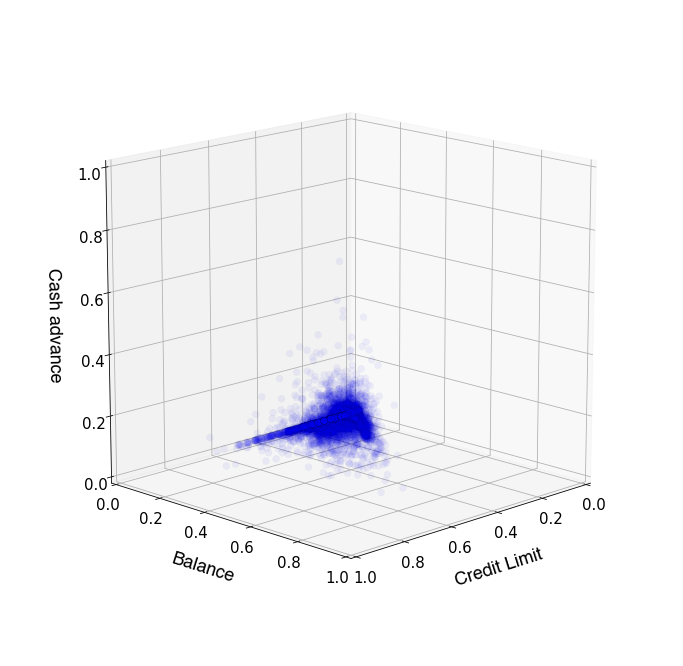

In [178]:
# Plot 3d scatter data of top three features contributing to PCA orthogonal to striations

# Filter features of interest based on limits

data = X_log

x_axis = 'CREDIT_LIMIT'
y_axis = 'BALANCE' # 'PAYMENTS' 
z_axis = 'CASH_ADVANCE' # 'PURCHASES' 

x_max = 1
y_max = 1
z_max = 1

x_filtered = data[(data[x_axis] < x_max) & (data[y_axis] < y_max) & (data[z_axis] < z_max)][x_axis]
y_filtered = data[(data[x_axis] < x_max) & (data[y_axis] < y_max) & (data[z_axis] < z_max)][y_axis]
z_filtered = data[(data[x_axis] < x_max) & (data[y_axis] < y_max) & (data[z_axis] < z_max)][z_axis]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d', facecolor='white')

ax.scatter(x_filtered, 
           y_filtered, 
           z_filtered, 
           s=50,
           alpha=0.05,
           lw=0.25,
           facecolor='blue',
           edgecolor='black',
           zorder=1)
  
ax.tick_params(axis = 'x', labelsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)
ax.tick_params(axis = 'z', labelsize = 15)

ax.set_xlabel('\n\nCredit Limit', fontname = 'Helvetica', fontsize = 18)
ax.set_ylabel('\n\nBalance', fontname = 'Helvetica', fontsize = 18)
ax.set_zlabel('\n\nCash advance', fontname = 'Helvetica', fontsize = 18)

ax.axes.set_xlim3d(left=0, right=x_max) 
ax.axes.set_ylim3d(bottom=0, top=y_max) 
ax.axes.set_zlim3d(bottom=0, top=z_max)

ax.view_init(15, 45)
ax.dist = 11

plt.show()